In [1]:
import scanpy as sc

In [14]:
RNA  = sc.read('SAHA_All_RNA_share.h5ad')
RNA.obs = RNA.obs[['Area','CenterX_global_px','CenterY_global_px','cell_ID','batch','SAHA_Sample','SAHA_name','Insitutype_Labelled','Insitutype_Broad']]
RNA.var = RNA.var[[]]
RNA

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2865647 × 1198
    obs: 'Area', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'batch', 'SAHA_Sample', 'SAHA_name', 'Insitutype_Labelled', 'Insitutype_Broad'
    uns: 'Insitutype_Broad_colors', 'Insitutype_Labelled_colors', 'SAHA_name_colors', 'SAHA_organcode_colors', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'normalized', 'normalized_all', 'raw'
    obsp: 'connectivities', 'distances'

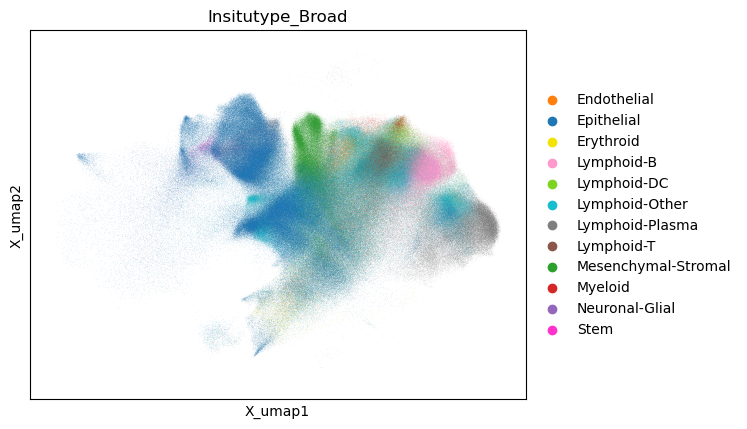

In [ ]:
GI_names = ['SAHA_APE_RNA.h5ad','SAHA_COL_RNA.h5ad','SAHA_ILE_RNA.h5ad','SAHA_STO_RNA.h5ad']
RNA_GI = RNA[RNA.obs['batch'].isin(GI_names)]
sc.pl.embedding(RNA_GI, basis='X_umap', color='Insitutype_Broad')

RNA_GI.write_h5ad('RNA_GI.h5ad')

In [3]:
RNA_ILE = RNA[RNA.obs['batch']=='SAHA_ILE_RNA.h5ad']
print(RNA_ILE)
print(RNA_ILE.obs['SAHA_name'].unique())
RNA_ILE.write_h5ad('RNA_ILE.h5ad')

View of AnnData object with n_obs × n_vars = 282870 × 1198
    obs: 'Area', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'batch', 'SAHA_Sample', 'SAHA_name', 'Insitutype_Labelled', 'Insitutype_Broad'
    uns: 'Insitutype_Broad_colors', 'Insitutype_Labelled_colors', 'SAHA_name_colors', 'SAHA_organcode_colors', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'normalized', 'normalized_all', 'raw'
    obsp: 'connectivities', 'distances'
['SAHA_CR_ILE_A1_SJ01', 'SAHA_CR_ILE_A1_EC01', 'SAHA_CR_ILE_A1_TAP03']
Categories (3, object): ['SAHA_CR_ILE_A1_EC01', 'SAHA_CR_ILE_A1_SJ01', 'SAHA_CR_ILE_A1_TAP03']


In [15]:
# Convert batch column to string to allow modifications
RNA.obs['batch'] = RNA.obs['batch'].astype(str)
# Replace batch names
RNA.obs.loc[RNA.obs['batch'].isin(['SAHA_LIV_RNA_A1.h5ad', 'SAHA_LIV_RNA_A2.h5ad']), 'batch'] = 'SAHA_LIV_RNA.h5ad'
# Convert back to categorical (optional, if you need it)
RNA.obs['batch'] = RNA.obs['batch'].astype('category')
# Verify the change
print(RNA.obs['batch'].unique())

for batch in RNA.obs['batch'].unique():
    tissue = batch.split('_')[1]
    print(batch)
    temp = RNA[RNA.obs['batch']==batch].copy()
    temp.obs_names_make_unique()
    temp.write_h5ad(f'RNA_{tissue}.h5ad')

['SAHA_APE_RNA.h5ad', 'SAHA_BM_RNA.h5ad', 'SAHA_COL_RNA.h5ad', 'SAHA_ILE_RNA.h5ad', 'SAHA_LIV_RNA.h5ad', 'SAHA_LN_RNA.h5ad', 'SAHA_PANC_RNA.h5ad', 'SAHA_PROS_RNA.h5ad', 'SAHA_STO_RNA.h5ad']
Categories (9, object): ['SAHA_APE_RNA.h5ad', 'SAHA_BM_RNA.h5ad', 'SAHA_COL_RNA.h5ad', 'SAHA_ILE_RNA.h5ad', ..., 'SAHA_LN_RNA.h5ad', 'SAHA_PANC_RNA.h5ad', 'SAHA_PROS_RNA.h5ad', 'SAHA_STO_RNA.h5ad']
SAHA_APE_RNA.h5ad
SAHA_BM_RNA.h5ad
SAHA_COL_RNA.h5ad
SAHA_ILE_RNA.h5ad
SAHA_LIV_RNA.h5ad
SAHA_LN_RNA.h5ad
SAHA_PANC_RNA.h5ad
SAHA_PROS_RNA.h5ad
SAHA_STO_RNA.h5ad
